# Ford GoBike System Data Exploration
> BY ABDULRAHEEM BASHIR

## Investigation Overview

In this investigation, I wanted to look at the characteristics of Members that could be used to predict the categories of sharing bike during trip. The main focus was on the user_type, gender, age, start_station_name, and end_station_name.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('clean_bike.csv')

In [3]:
# Query the 10 most popular start station as a table
# and assign it to start_station_count variable
# Get the index in order
# and assign it to start_station_order variable
# Subset the dataframe that has the 10 most popular start station
# and assign it to start_subset_df variable

start_station_count = bike_df['start_station_name'].value_counts().reset_index(name='station_trips_count')[:10]
start_station_order = start_station_count['index']
start_subset_df = bike_df.loc[bike_df['start_station_name'].isin(start_station_count["index"])]

In [4]:
# Query the 10 most popular end station as a table
# and assign it to end_station_count variable
# Get the index in order
# and assign it to end_station_order variable
# Subset the dataframe that has the 10 most popular end station
# and assign it to end_subset_df variable

end_station_count = bike_df['end_station_name'].value_counts().reset_index(name='station_trips_count')[:10]
end_station_order = end_station_count['index']
end_subset_df = bike_df.loc[bike_df['end_station_name'].isin(end_station_count["index"])]

## Association of members categoriy to bike sharing

The records show that subscribers shared bikes, however no consumer ever shared a bike for the duration of a journey. This makes sense because becoming a subscription entails becoming a member of the community, and sharing a bike may be one of the perks of being a subscriber.

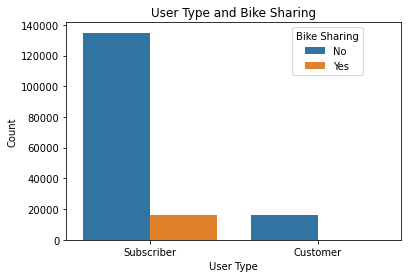

In [5]:
# ploting the association
order = bike_df['user_type'].value_counts().index
sns.countplot(data = bike_df, x = 'user_type', hue = 'bike_share_for_all_trip', order = order)

# Format the plot's visual
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title = 'Bike Sharing', bbox_to_anchor=(0.9, 1))
plt.title('User Type and Bike Sharing');

## Majority of Members Category
- The dataset depect that most members are between the ages of 20 and 40.
- The bulk of members are males, accounting for up to 74% of all users, while female members account for approximately 24% of all users.
- Majority of members are subscribers, accounting for up to 90% of all users.

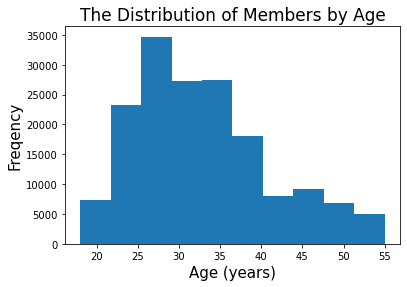

In [6]:
# plot the dustribution of members by age
plt.hist(data = bike_df, x = 'age')

# Format the plot's visual
plt.xlabel('Age (years)', size = 15)
plt.ylabel('Freqency', size = 15)
plt.title('The Distribution of Members by Age', size = 17);

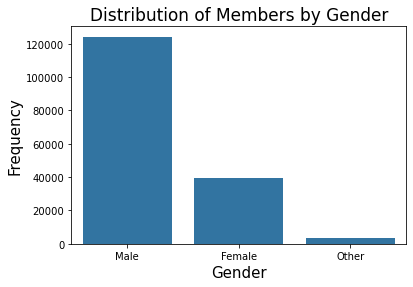

In [7]:
# plot the user type count
color = sns.color_palette()[0]
order = bike_df['member_gender'].value_counts().index
sns.countplot(data = bike_df, x= 'member_gender', color = color, order = order)

# Format the plot's visual
plt.xlabel('Gender', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Distribution of Members by Gender', size = 17);

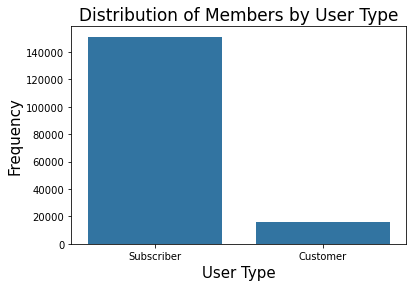

In [8]:
# plot the user type count
order = bike_df['user_type'].value_counts().index
sns.countplot(data = bike_df, x = 'user_type', color = color, order = order)

# Format the plot's visual
plt.xlabel('User Type', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Distribution of Members by User Type', size = 17);

## Top 10 Start and Stop Station

- 'Market ST at 10th St' has the most start trips among the top 10 most common start stations, while 'Stewart St at Market St' has the fewest.
- 'San Francisco Caltrain Station 2 (Townsend St at 4th St' has the most end trips among the top 10 most common end stations, while 'Powell St BART Station (Market St at 5th St)' has the fewest.
- It's also worth noting that 'Market St at 10th St', 'San Francisco Caltrain Station 2 (Townsend St at 4th St)', 'Montgomery St BART Station (Market St at 2nd St)', and 'Powell St BART Station (Market St at 4th St)' all rank in the top 5 for both start and end stations.

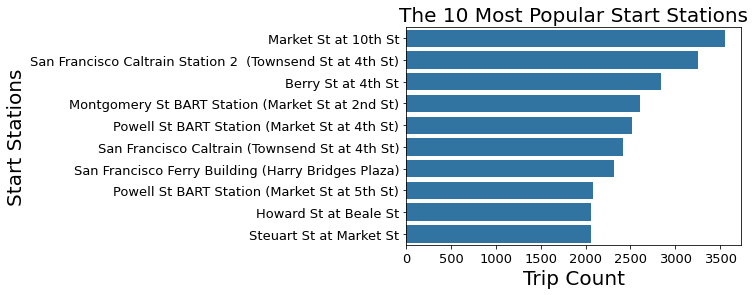

In [9]:
# Obtain the first color from a seaborn color palette.
# and assign it to color variable
# plot the count of start station using bar chart
# because of the long station names

sns.countplot(data = start_subset_df, y = 'start_station_name', color = color, order = start_station_order)

# Format the plot's visual
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('Start Stations',size=20)
plt.xlabel('Trip Count',size=20)
plt.title('The 10 Most Popular Start Stations',size=20);

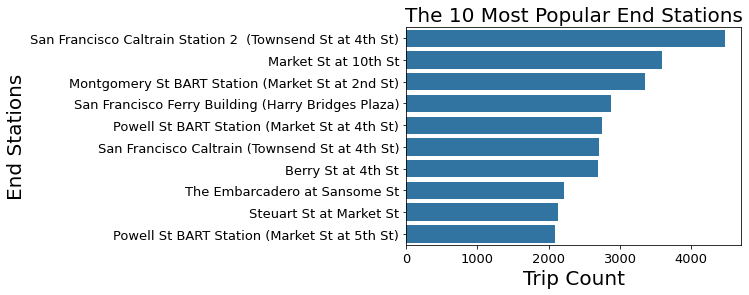

In [10]:
# plot the count of start station using bar chart
# because of the long station names
sns.countplot(data = end_subset_df, y = 'end_station_name', color = color, order = end_station_order)

# Format the plot's visual
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('End Stations',size=20)
plt.xlabel('Trip Count',size=20)
plt.title('The 10 Most Popular End Stations',size=20);